In [1]:
import pandas as pd

In [2]:
# Importing the CSV file that contains the dataset
netflix_df = pd.read_csv('/content/netflix1.csv')

netflix_df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
# Checking for any nulls in any of the columns
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [4]:
# Checking if there are any duplicated rows
netflix_df.duplicated().sum()

0

In [5]:
# The show_id column should be unique, so let's check
netflix_df.show_id.duplicated().sum()

0

In [6]:
# Let's check the titles as well
netflix_df.title.duplicated().sum()

3

In [7]:
# Drilling down into the three duplicated titles
netflix_df.loc[netflix_df.title.duplicated(), :]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
537,s5965,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


In [8]:
netflix_df.loc[netflix_df.title == '15-Aug', :]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
2925,s3963,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


In [9]:
netflix_df.loc[netflix_df.title == '9-Feb', :]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
393,s3997,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
537,s5965,TV Show,9-Feb,Not Given,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"


In [10]:
netflix_df.loc[netflix_df.title == '22-Jul', :]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
3285,s4523,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"


All of the three titles seem to be duplicated rows, but with a different show_id, so we will drop all three.

In [11]:
# Dropping the three duplicated titles and keeping the first occurrence
netflix_df.drop_duplicates(subset='title', keep='first', inplace=True)

In [12]:
# Checking that there are no duplicated titles now
netflix_df.title.duplicated().sum()

0

In [13]:
# Checking the numeric variables
netflix_df.describe()

,release_year
count,8787.000000
mean,2014.181746
std,8.826635
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [14]:
# Types and number of nulls
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8787 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8787 non-null   object
 1   type          8787 non-null   object
 2   title         8787 non-null   object
 3   director      8787 non-null   object
 4   country       8787 non-null   object
 5   date_added    8787 non-null   object
 6   release_year  8787 non-null   int64 
 7   rating        8787 non-null   object
 8   duration      8787 non-null   object
 9   listed_in     8787 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.1+ KB


In [15]:
# The date_added column should be of the date type
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

In [16]:
netflix_df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [17]:
# Exploring the duration column to extract the numbers and convert it
# to a numeric column
netflix_df.duration.unique()

array(['90 min', '1 Season', '91 min', '125 min', '9 Seasons', '104 min',
       '87 min', '127 min', '76 min', '71 min', '131 min', '39 min',
       '36 min', '34 min', '35 min', '46 min', '67 min', '65 min',
       '61 min', '166 min', '103 min', '97 min', '106 min', '2 Seasons',
       '4 Seasons', '147 min', '94 min', '161 min', '111 min', '110 min',
       '105 min', '96 min', '124 min', '116 min', '98 min', '115 min',
       '122 min', '55 min', '99 min', '88 min', '100 min', '6 Seasons',
       '3 Seasons', '23 min', '102 min', '93 min', '95 min', '85 min',
       '83 min', '182 min', '5 Seasons', '92 min', '84 min', '48 min',
       '145 min', '119 min', '80 min', '128 min', '143 min', '273 min',
       '117 min', '114 min', '118 min', '108 min', '37 min', '121 min',
       '63 min', '142 min', '113 min', '154 min', '120 min', '82 min',
       '109 min', '101 min', '86 min', '77 min', '229 min', '15 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '44 min',
  

In [18]:
# Custom function to extract the duration
def get_duration(duration_text):
  split_duration = str.split(duration_text)
  duration_min = int(split_duration[0])

  return duration_min


In [19]:
# Applying the previous function to each row of the 
# duration column
netflix_df['duration_int'] = netflix_df['duration'].apply(get_duration)

In [20]:
# Checking that the number has been extracted correctly
netflix_df.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_int
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,90
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",9
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",104
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",87
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",127
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,2021-05-01,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals",76


In [21]:
# Checking the type of the new column, which should be int
netflix_df.duration_int.dtypes

dtype('int64')

Now let's perform some exploratory data analysis (EDA) to get to know the 
dataset a bit better!

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Making the plots bigger than default to see them better
sns.set(rc={'figure.figsize':(12,9)})

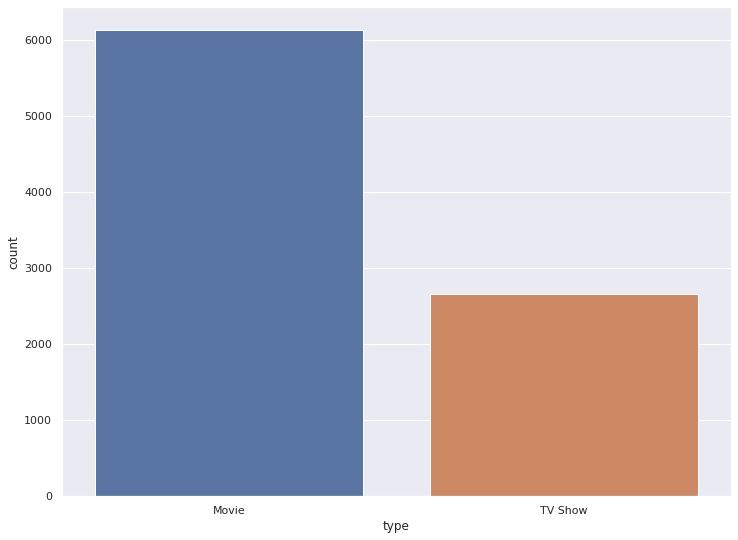

In [26]:
# Comparing the number of movies and TV shows
sns.countplot(data=netflix_df, x='type')

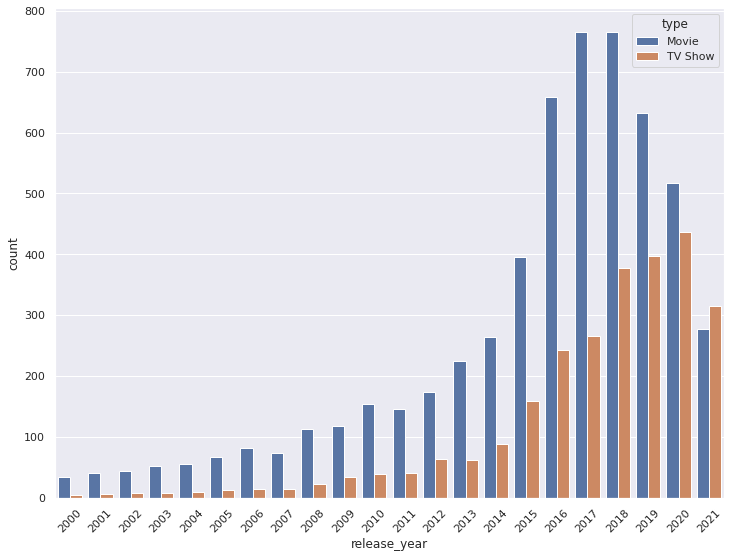

In [27]:
# Selecting only the last 20 years
last_20_years = netflix_df.loc[netflix_df['release_year'] >= 2000, :]

# Plotting the number of movies and TV shows per year
sns.countplot(data=last_20_years, x='release_year', hue='type')

plt.xticks(rotation=45)

plt.show()

In [28]:
# Selecting the top 20 countries that produce the most combination
# of movies/TV shows
first_20_countries = list(netflix_df['country'].value_counts().index)[:20]

first_20_countries_df = netflix_df.loc[netflix_df['country'].isin(first_20_countries), :]

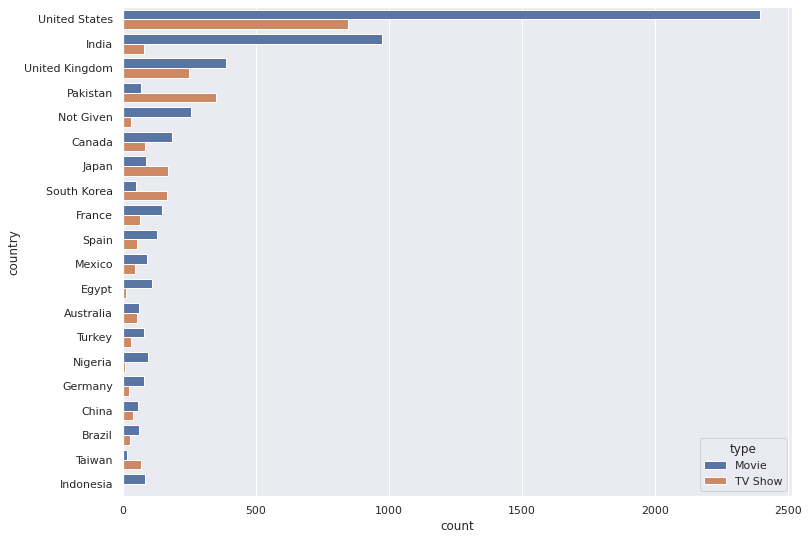

In [29]:
# Plotting the those 20 countries per production type
sns.countplot(data=first_20_countries_df, y='country', 
              order=first_20_countries_df['country'].value_counts().index,
              hue='type')

plt.show()

In [30]:
genres_dic = dict()

# This will generate a dictionary with a count for the number of times
# each genre appears in the dataset
for genre_str in netflix_df['listed_in']:
  genre_list = genre_str.split(',')
  for genre in genre_list:
    stripped_genre = genre.strip()
    if stripped_genre not in genres_dic:
      genres_dic[stripped_genre] = 1
    else:
      genres_dic[stripped_genre] += 1

genres_dic

{'Documentaries': 869,
 'Crime TV Shows': 469,
 'International TV Shows': 1348,
 'TV Action & Adventure': 167,
 'TV Dramas': 761,
 'TV Horror': 75,
 'TV Mysteries': 98,
 'Children & Family Movies': 641,
 'Comedies': 1673,
 'Dramas': 2424,
 'Independent Movies': 755,
 'International Movies': 2752,
 'British TV Shows': 252,
 'Reality TV': 255,
 'Music & Musicals': 375,
 'Movies': 53,
 'Docuseries': 394,
 "Kids' TV": 448,
 'Romantic Movies': 616,
 'Horror Movies': 357,
 'Sci-Fi & Fantasy': 243,
 'Thrillers': 576,
 'Spanish-Language TV Shows': 173,
 'TV Comedies': 573,
 'TV Thrillers': 57,
 'Anime Series': 174,
 'Korean TV Shows': 151,
 'Romantic TV Shows': 370,
 'Action & Adventure': 859,
 'Classic Movies': 116,
 'Anime Features': 71,
 'Teen TV Shows': 69,
 'Stand-Up Comedy & Talk Shows': 56,
 'Sports Movies': 219,
 'Science & Nature TV': 92,
 'Cult Movies': 71,
 'Stand-Up Comedy': 343,
 'Faith & Spirituality': 65,
 'LGBTQ Movies': 102,
 'TV Sci-Fi & Fantasy': 83,
 'TV Shows': 16,
 'Class

In [31]:
# Transforming the previous dictionary to a pandas DataFrame
genres_df = pd.DataFrame.from_dict(genres_dic, orient='index', columns=['Count'])

# Resetting the index
genres_df.reset_index(inplace=True)

# Renaming the index column
genres_df = genres_df.rename(columns = {'index':'Genre'})

# Ordering the dataframe by count in descending order
genres_df.sort_values(by='Count', inplace=True, ascending=False)

genres_df.head()

,Genre,Count
11,International Movies,2752
9,Dramas,2424
8,Comedies,1673
2,International TV Shows,1348
0,Documentaries,869


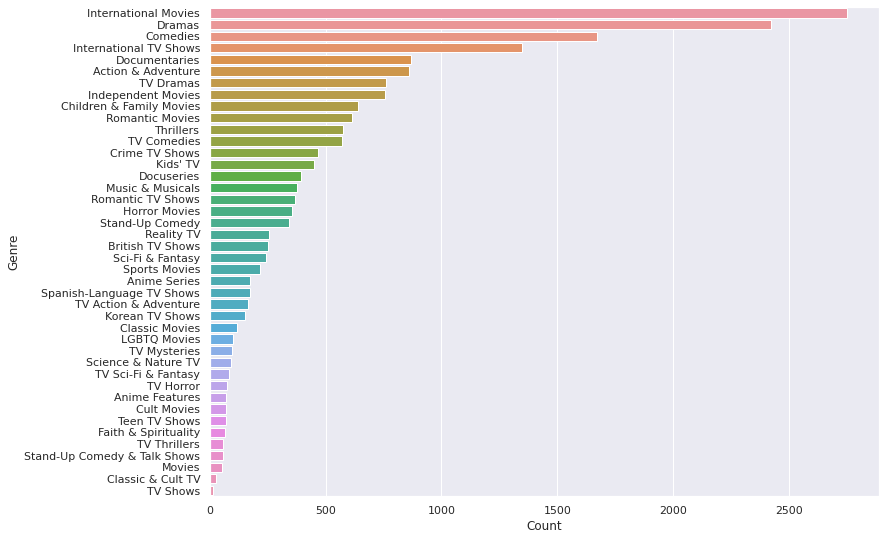

In [32]:
# Plotting the genres count
sns.barplot(data=genres_df, x='Count', y='Genre')

plt.show()

Now let's explore the number of movies by genre and country for the top 4 countries in production.

In [33]:
# Custom function to transform the str values of the listed_in column to a list
def split_genres(genre_str):
  return genre_str.split(', ')

# Selecting the top 4 most productive countries
top_4_countries = list(netflix_df['country'].value_counts().index)[:4]

# Filtering the dataset to keep the top 4 countries and the needed columns
genres_by_country_df = netflix_df.loc[netflix_df['country'].isin(top_4_countries), ['country', 'listed_in']]

# Applying the function we previously defined
genres_by_country_df['listed_in_list'] = genres_by_country_df['listed_in'].apply(split_genres)

# Exploding the lists in the listed_in_list column to get a row for each
# genre
genres_by_country_df = genres_by_country_df.explode('listed_in_list')

# Converting the column back to str, as it would remain as a list otherwise
genres_by_country_df['listed_in_list'] = genres_by_country_df['listed_in_list'].astype(str)

In [39]:
# Grouping by country and genre to get the count of each
grouped = genres_by_country_df.groupby(['country', 'listed_in_list']).size().reset_index()

# Renaming columns to have more intuitive names
grouped = grouped.rename(columns={0: 'Count', 'listed_in_list': 'genre'})

# Sorting the dataset to by country and count
grouped.sort_values(['country', 'Count'], ascending=False, inplace=True)

grouped

,country,genre,Count
117,United States,Dramas,679
112,United States,Comedies,616
115,United States,Documentaries,457
109,United States,Children & Family Movies,347
120,United States,Independent Movies,331
...,...,...,...
32,India,TV Thrillers,3
1,India,British TV Shows,2
16,India,LGBTQ Movies,2
29,India,TV Mysteries,2


In [40]:
# Keeping only the 5 most popular genres by country
grouped = grouped.groupby(['country']).head(5)

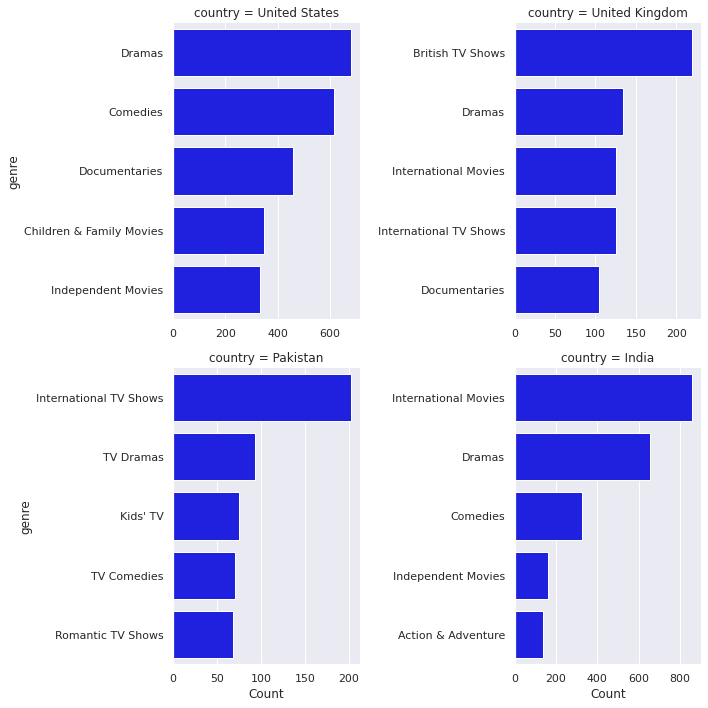

In [41]:
# Now we can plot the 5 most popular genres for the top 4 countries
sns.catplot(data=grouped, y='genre', x='Count', kind='bar', 
            col='country', col_wrap=2, sharey=False, sharex=False, color='blue')

plt.show()